9.4

Generate a simulated two-class data set with 100 observations and two features in which there is a visible but non-linear separation between the two classes. Show that in this setting, a support vector machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support vector classifier on the training data. Which technique performs best on the test data? Make plots and report training and test error rates in order to back up your assertions.

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots, cm
import statsmodels.api as sm
from scipy.stats import (ttest_1samp,
                         ttest_rel,
                         ttest_ind,
                         t as t_dbn)
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multitest import multipletests as mult_test
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.tree import (DecisionTreeClassifier as DTC, 
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss,
                             RocCurveDisplay)
from sklearn.ensemble import \
                             (RandomForestRegressor as RF,
                             GradientBoostingRegressor as GBR)
from ISLP.bart import BART
import warnings; warnings.simplefilter('ignore')

In [3]:
rng = np.random.default_rng(1)
X = rng.standard_normal((100,2))
y1 = np.array([-1]*25 + [1]*75)
y2 = np.array([1]*75 + [-1]*25)
X[y1==-1] -= 3
X[y2==-1] += 3
y = np.array([-1]*25 + [1]*50 + [-1]*25)

In [4]:
y==1

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

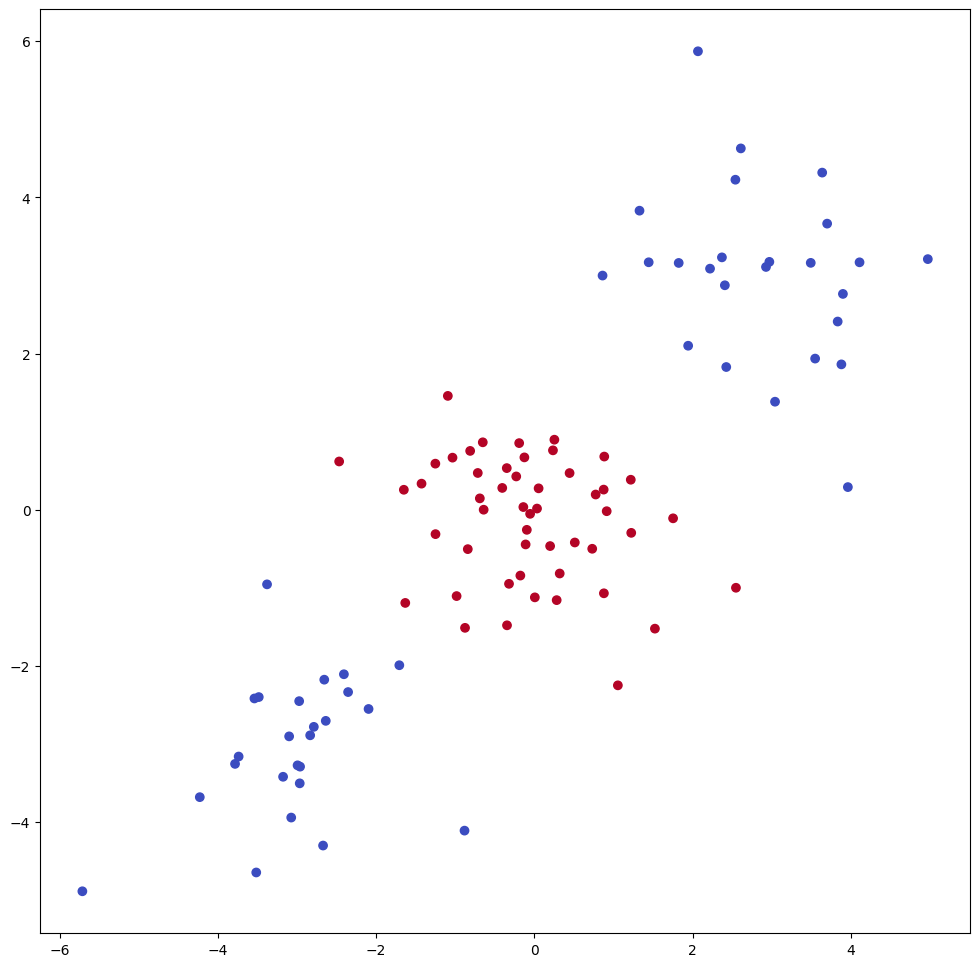

In [5]:
ax = subplots(figsize=(12,12))[1]
ax.scatter(X[:,0],
          X[:,1],
          c=y,
          cmap=cm.coolwarm)

Now we have achieved a visible non-linear seperation between the two classes

In [6]:
X_train, X_test, y_train, y_test = skm.train_test_split(X,y, test_size=0.20, random_state=0)

In [7]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train,y_train)

SVC(kernel='linear')

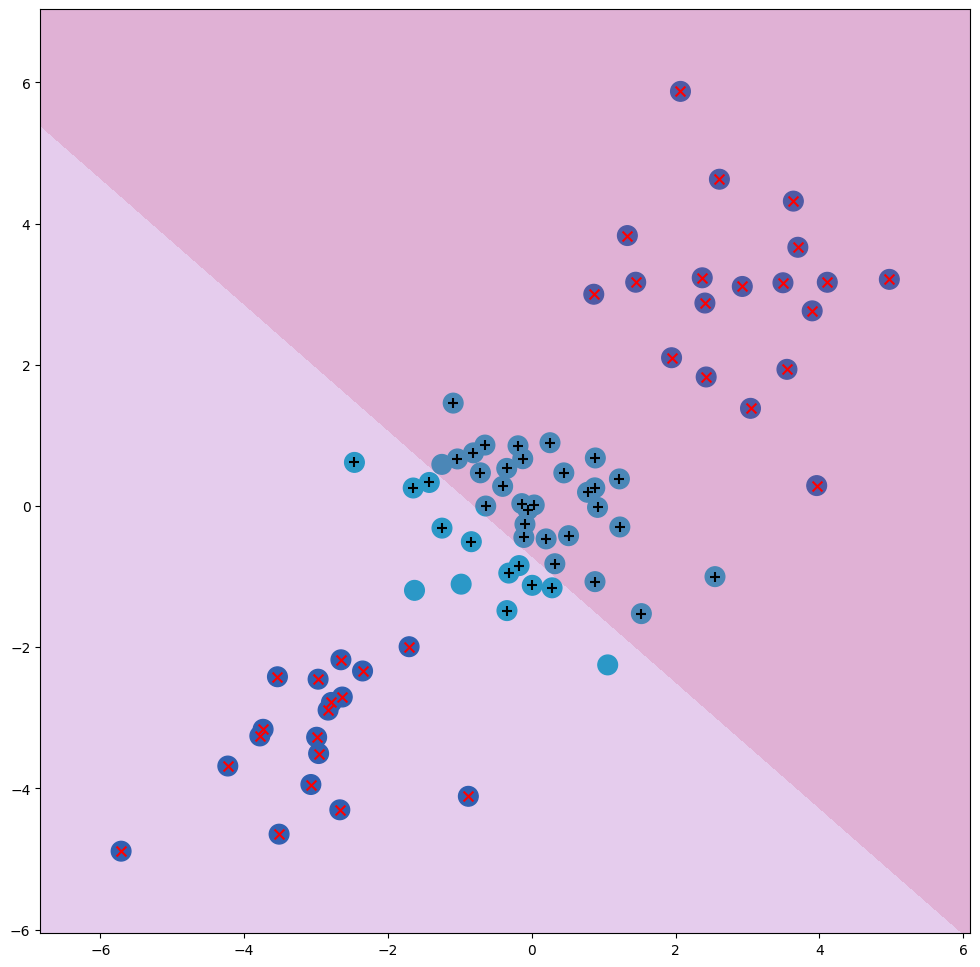

In [8]:
ax = subplots(figsize=(12,12))[1]
plot_svm(X_train,
        y_train,
        svm_linear,
        ax=ax)

In [9]:
svm_radial = SVC(kernel='rbf')
svm_radial.fit(X_train,
              y_train)

SVC()

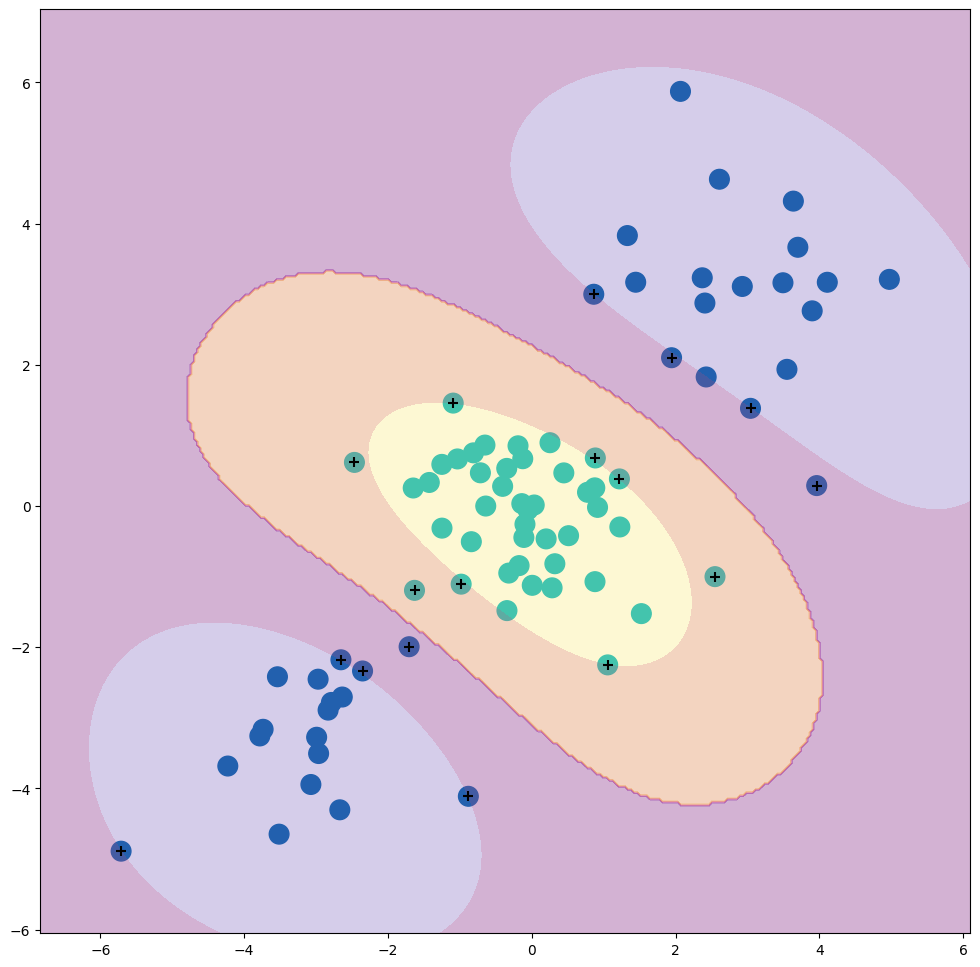

In [10]:
ax = subplots(figsize=(12,12))[1]
plot_svm(X_train,
        y_train,
        svm_radial,
        ax=ax)

As is clear the linear hyperplane is not able to find a satisfying seperation between the two classes but, we used radial basis function, our radial SVM is able to seperate the two classes with the decision boundary show in red in the above figure and the light purple and orange shows the maximal margin between the both classes.

In [11]:
y_hattr_rad = svm_radial.predict(X_train)
y_hattr_lin = svm_linear.predict(X_train)
#confusion_table(y_hatrad_train,y_train)

print('SVC Radial Training error rate',1-accuracy_score(y_hattr_rad,y_train))
print('SVC Training error rate',1-accuracy_score(y_hattr_lin,y_train))

SVC Radial Training error rate 0.0
SVC Training error rate 0.4625


In [12]:
y_hattst_rad = svm_radial.predict(X_test)
y_hattst_lin = svm_linear.predict(X_test)

print('SVC Radial Test error rate',1-accuracy_score(y_hattst_rad,y_test))
print('SVC Test error rate',1-accuracy_score(y_hattst_lin,y_test))

SVC Radial Test error rate 0.0
SVC Test error rate 0.65


We can see the error rate for the linear SVC on the test set is $65\%$ while the radial SVM is able to achieve $0\%$ error rate on the test set, i.e. is able to classify our generated data $100\%$ correctly.
______________________________________________________________________________________________________________________________

9.5

We have seen that we can fit an SVM with a non-linear kernel in order to perform classification using a non-linear decision boundary. We will now see that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features.

(a)

Generate a data set with n = 500 and p =2, such that the observations belong to two classes with a quadratic decision boundary between them. For instance, you can do this as follows:

$\verb|
rng = np.random.default_rng(5)
|$

$\verb|
x1 = rng.uniform(size=500)- 0.5
|$

$\verb|
x2 = rng.uniform(size=500)- 0.5
|$

$\verb|
y = x1**2- x2**2 > 0
|$

In [53]:
rng = np.random.default_rng(5)
x1 = rng.uniform(size=500) - 0.5
x2 = rng.uniform(size=500) - 0.5
y = x1**2 - x2**2 > 0

(b)

Plot the observations, colored according to their class labels. Your plot should display X1 on the x-axis, and X2 on the y axis.

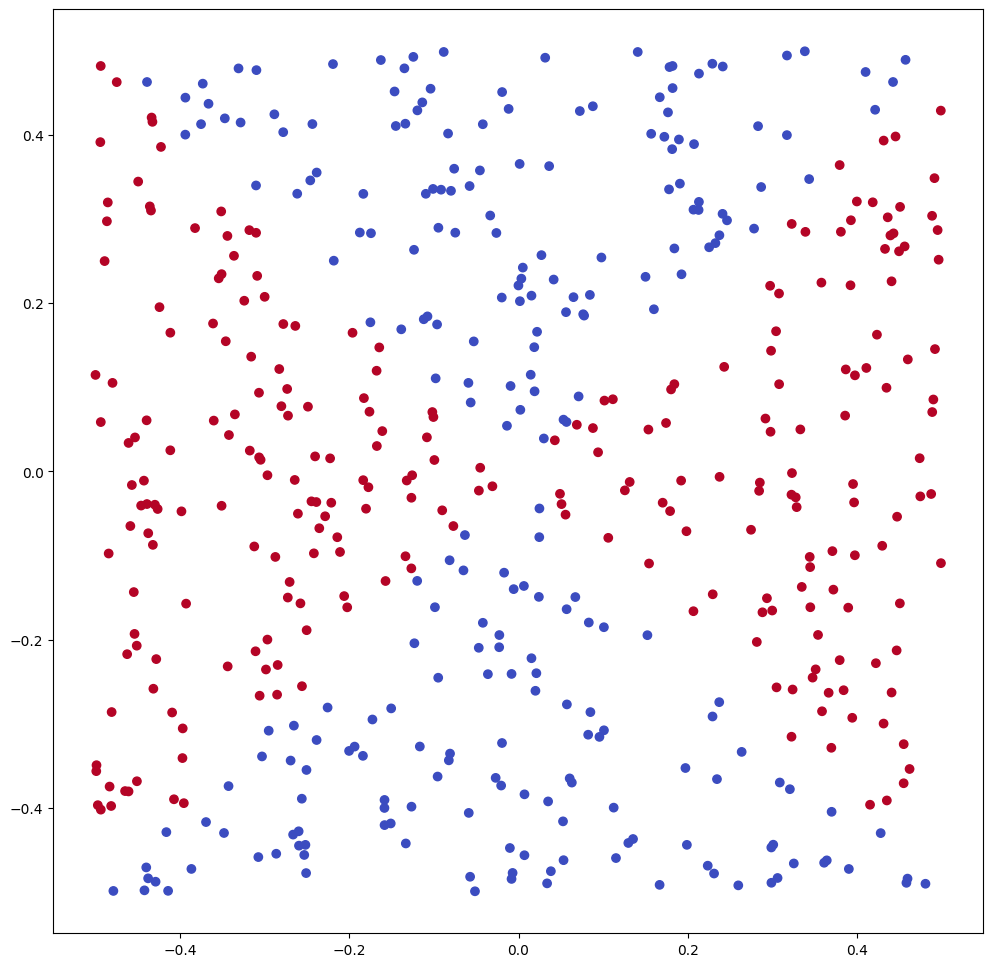

In [54]:
ax = subplots(figsize=(12,12))[1]
ax.scatter(x1,
          x2,
          c=y,
          cmap=cm.coolwarm)

(c)

Fit a logistic regression model to the data, using X1 and X2 as predictors.

In [55]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns

X = np.array([x1] + [x2]).T
clf = LogisticRegression(fit_intercept=False,random_state=0).fit(X,y)

(d)

Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be linear.

(-0.52, 0.52)

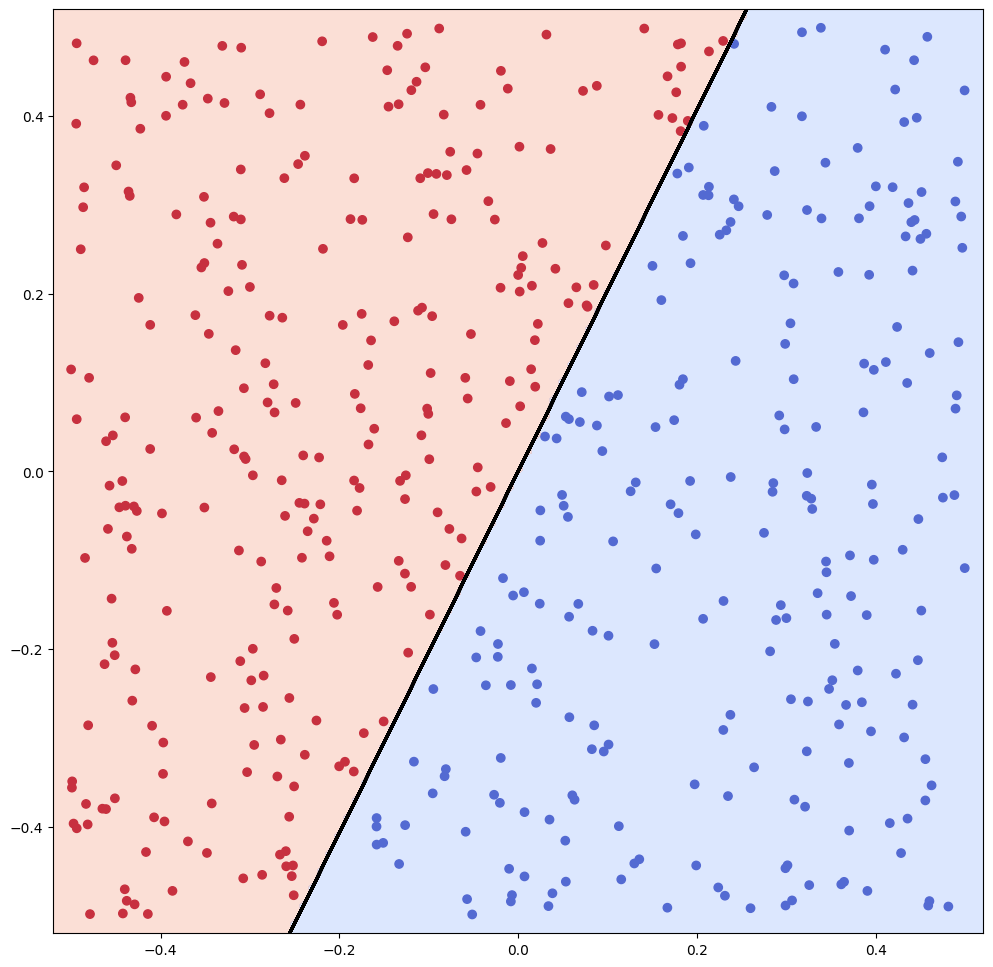

In [56]:
y_hat = clf.predict(X)

x_min, x_max = x1.min() - 1, x1.max() + 1
y_min, y_max = x2.min() - 1, x2.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                 np.arange(y_min, y_max, 0.01))
ax = subplots(figsize=(12,12))[1]
ax.scatter(x1,
          x2,
          c=y_hat,
          cmap=cm.coolwarm)
ax.plot(x1,(-clf.coef_[0,0]/clf.coef_[0,1])*x1,color='k',linewidth=2)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.3, cmap=cm.coolwarm)
ax.set_ylim(-0.52,0.52)
ax.set_xlim(-0.52,0.52)

(e)

Now fit a logistic regression model to the data using non-linear functions of $X_1$ and $X_2$ as predictors (e.g. $X^2_1$, $X_1 \times X_2$, $log(X_2)$, and so forth).

In [57]:
X1 = np.array([np.log(x1)] + [np.log(x2)]).T
X2 = np.array([x1**2] + [x2**2]).T
X3 = np.array([x1*x2] + [np.log(x2*x1)]).T
X4 = np.array([np.log(x1)] + [x2**5]).T
X5 = np.array([np.log(x1)**2] + [np.log(x2)]).T

In [58]:
X1[np.isnan(X1)]=0
X2[np.isnan(X2)]=0
X3[np.isnan(X3)]=0
X4[np.isnan(X4)]=0
X5[np.isnan(X5)]=0

clf1 = LogisticRegression(random_state=0,fit_intercept=False).fit(X1,y)
clf2 = LogisticRegression(random_state=0,fit_intercept=False).fit(X2,y)
clf3 = LogisticRegression(random_state=0,fit_intercept=False).fit(X3,y)
clf4 = LogisticRegression(random_state=0,fit_intercept=False).fit(X4,y)
clf5 = LogisticRegression(random_state=0,fit_intercept=False).fit(X5,y)

(f)

Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be obviously non-linear. If it is not, then repeat (a)–(e) until you come up with an example in which the predicted class labels are obviously non-linear.

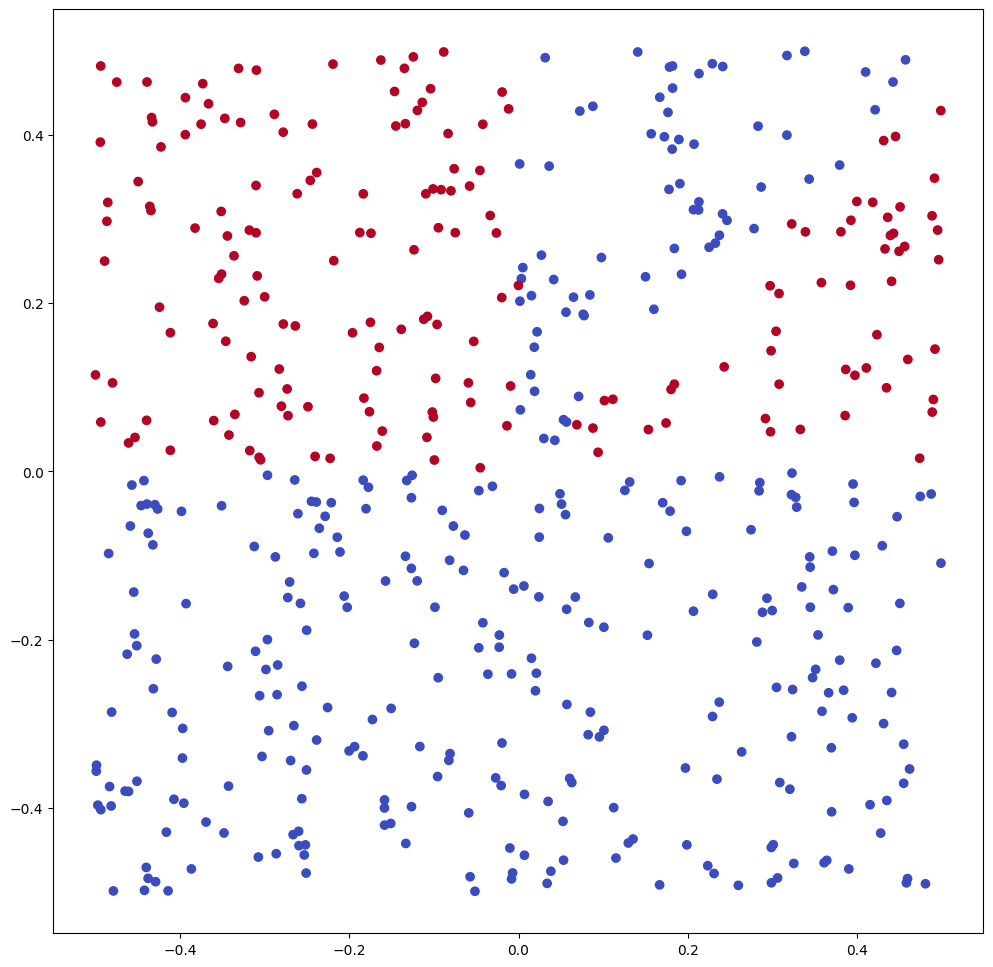

In [59]:
y_hat1 = clf1.predict(X1)
ax = subplots(figsize=(12,12))[1]
ax.scatter(x1,
          x2,
          c=y_hat1,
          cmap=cm.coolwarm)
#ax.plot(x1,x1**(-clf1.coef_[0,0]/clf1.coef_[0,1]),color='k',linewidth=2)

In [60]:
print('Accuracy score',1-accuracy_score(y_hat1,y))

Accuracy score 0.398


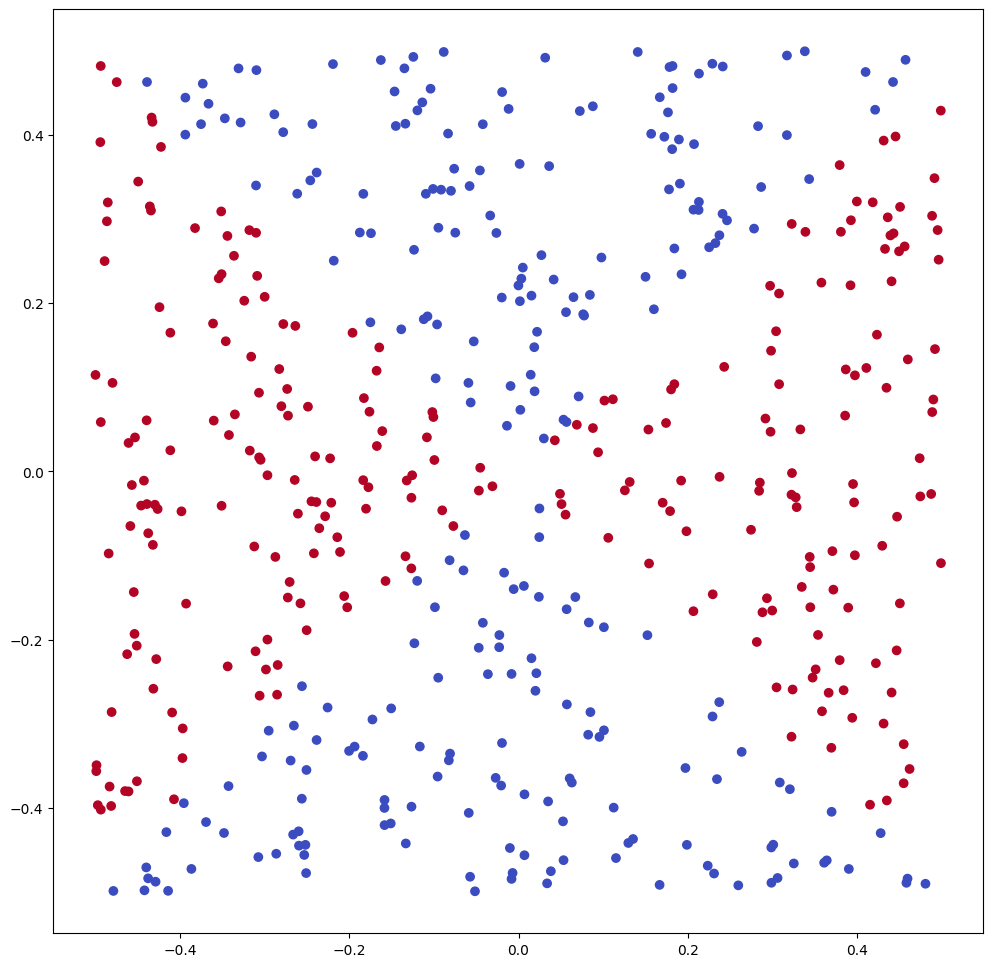

In [61]:
y_hat2 = clf2.predict(X2)
ax = subplots(figsize=(12,12))[1]
ax.scatter(x1,
          x2,
          c=y_hat2,
          cmap=cm.coolwarm)
#ax.plot(x1,np.sqrt((-clf.coef_[0,0]/clf.coef_[0,1])*x1**2),color='k',linewidth=2)
#ax.plot(x1,-np.sqrt((-clf.coef_[0,0]/clf.coef_[0,1])*x1**2),color='k',linewidth=2)

In [62]:
print('Accuracy score',1-accuracy_score(y_hat2,y))

Accuracy score 0.0040000000000000036


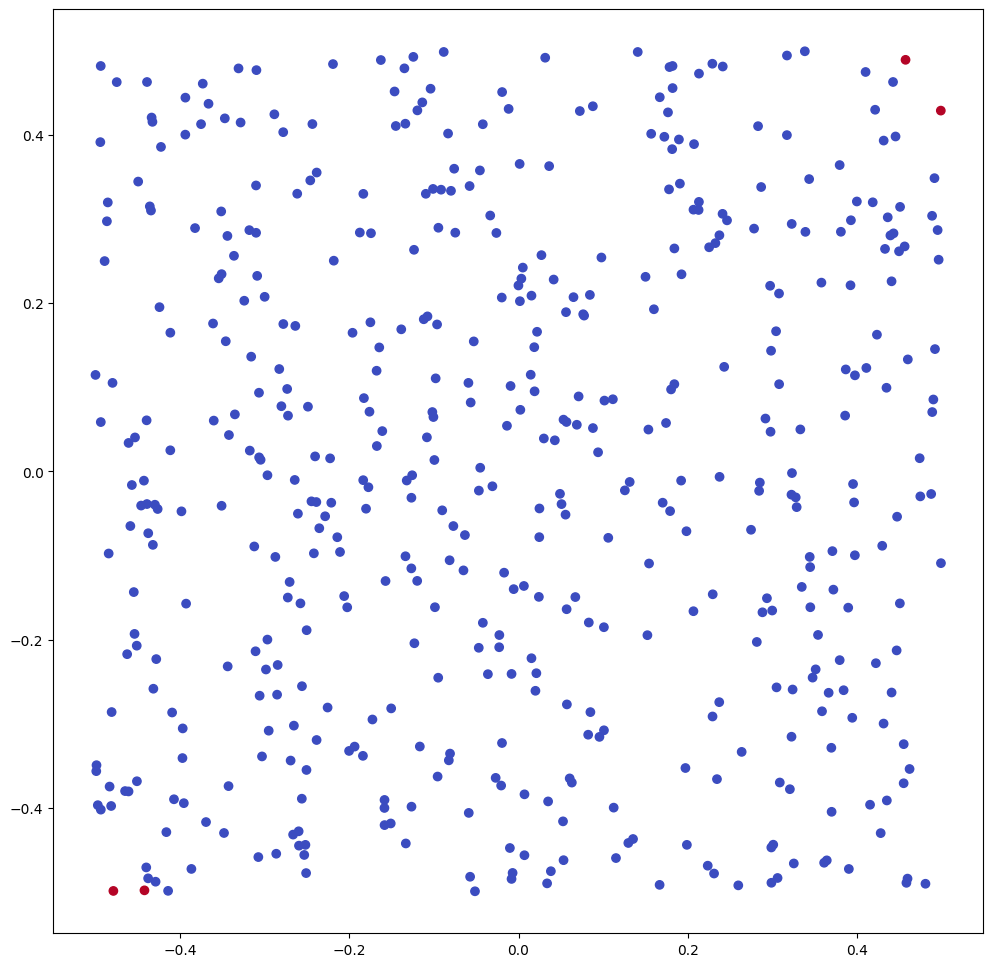

In [63]:
y_hat3 = clf3.predict(X3)
ax = subplots(figsize=(12,12))[1]
ax.scatter(x1,
          x2,
          c=y_hat3,
          cmap=cm.coolwarm)
#ax.plot(x1,(-clf.coef_[0,0]/clf.coef_[0,1])*x1,color='k',linewidth=2)

In [64]:
print('Accuracy score',1-accuracy_score(y_hat3,y))

Accuracy score 0.51


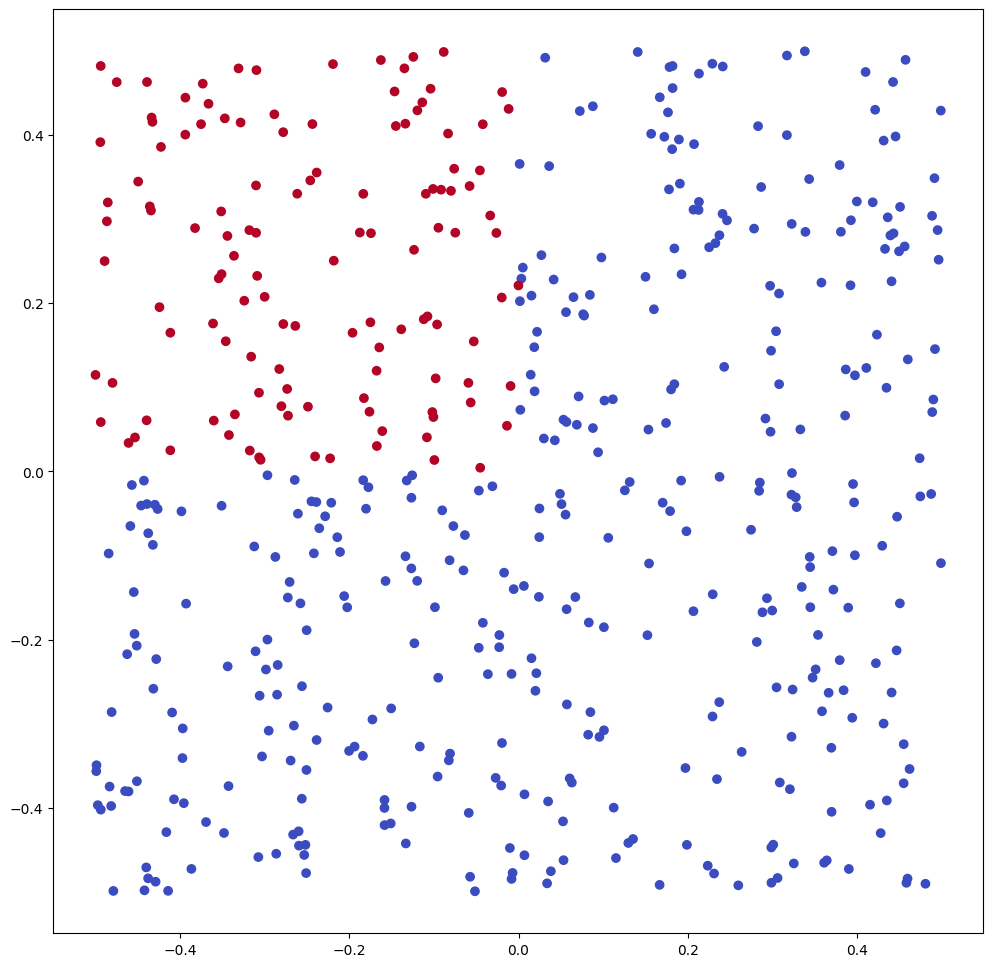

In [65]:
y_hat4 = clf4.predict(X4)
ax = subplots(figsize=(12,12))[1]
ax.scatter(x1,
          x2,
          c=y_hat4,
          cmap=cm.coolwarm)
#ax.plot(x1,(-clf.coef_[0,0]/clf.coef_[0,1])*x1,color='k',linewidth=2)

In [66]:
print('Accuracy score',1-accuracy_score(y_hat4,y))

Accuracy score 0.502


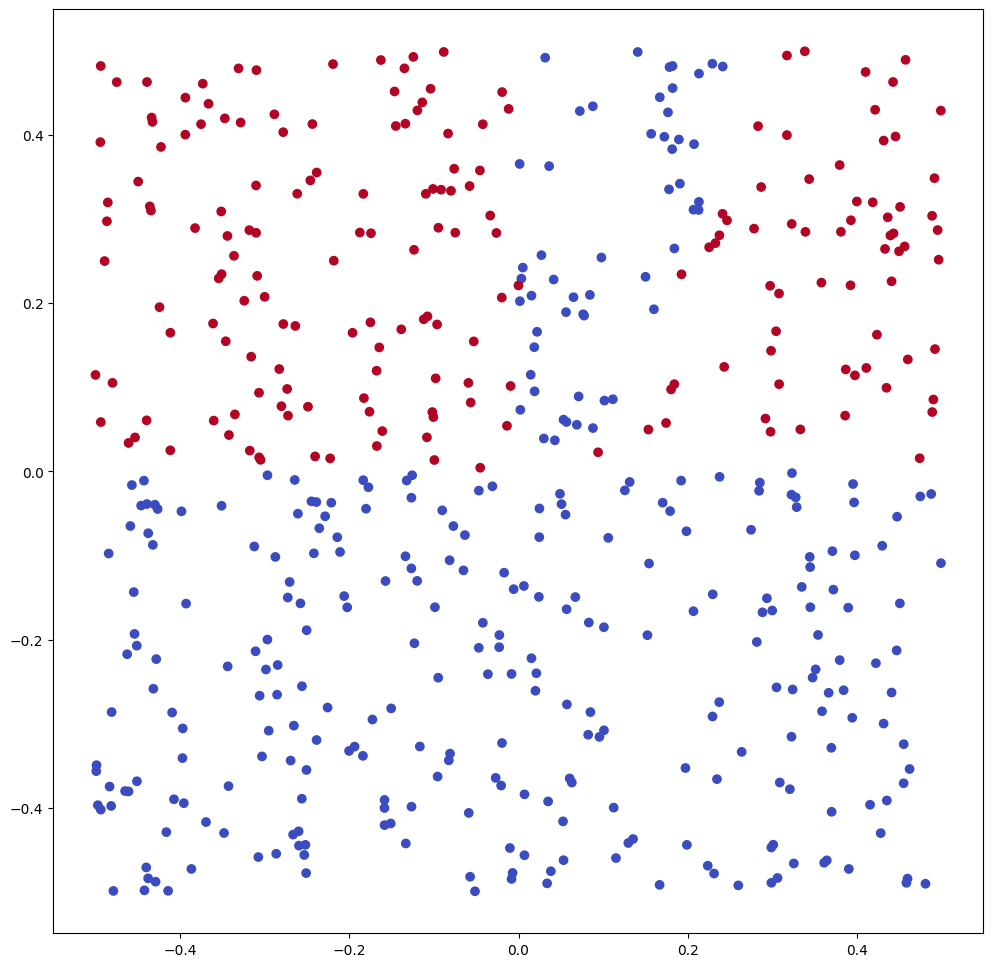

In [67]:
y_hat5 = clf5.predict(X5)
ax = subplots(figsize=(12,12))[1]
ax.scatter(x1,
          x2,
          c=y_hat5,
          cmap=cm.coolwarm)
#ax.plot(x1,(-clf.coef_[0,0]/clf.coef_[0,1])*x1,color='k',linewidth=2)

In [68]:
print('Accuracy score',1-accuracy_score(y_hat5,y))

Accuracy score 0.43799999999999994


(g)

Fit a support vector classifier to the data with X1 and X2 as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

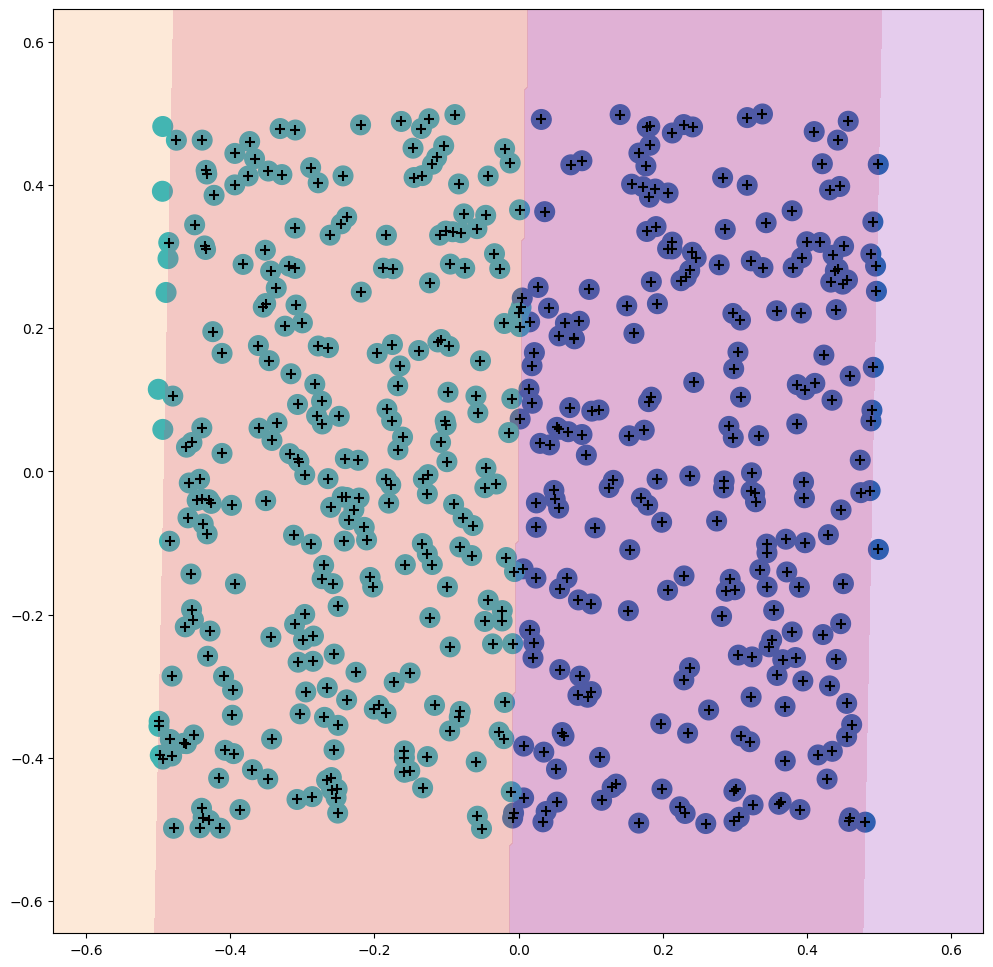

In [75]:
svm = SVC(kernel='linear',C=100).fit(X,y)
y_pred = svm.predict(X)
ax = subplots(figsize=(12,12))[1]
plot_svm(X,
        y_pred,
        svm,
        ax=ax)

In [76]:
print('Training error rate',1-accuracy_score(y_pred,y))

Training error rate 0.488


(h)

Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

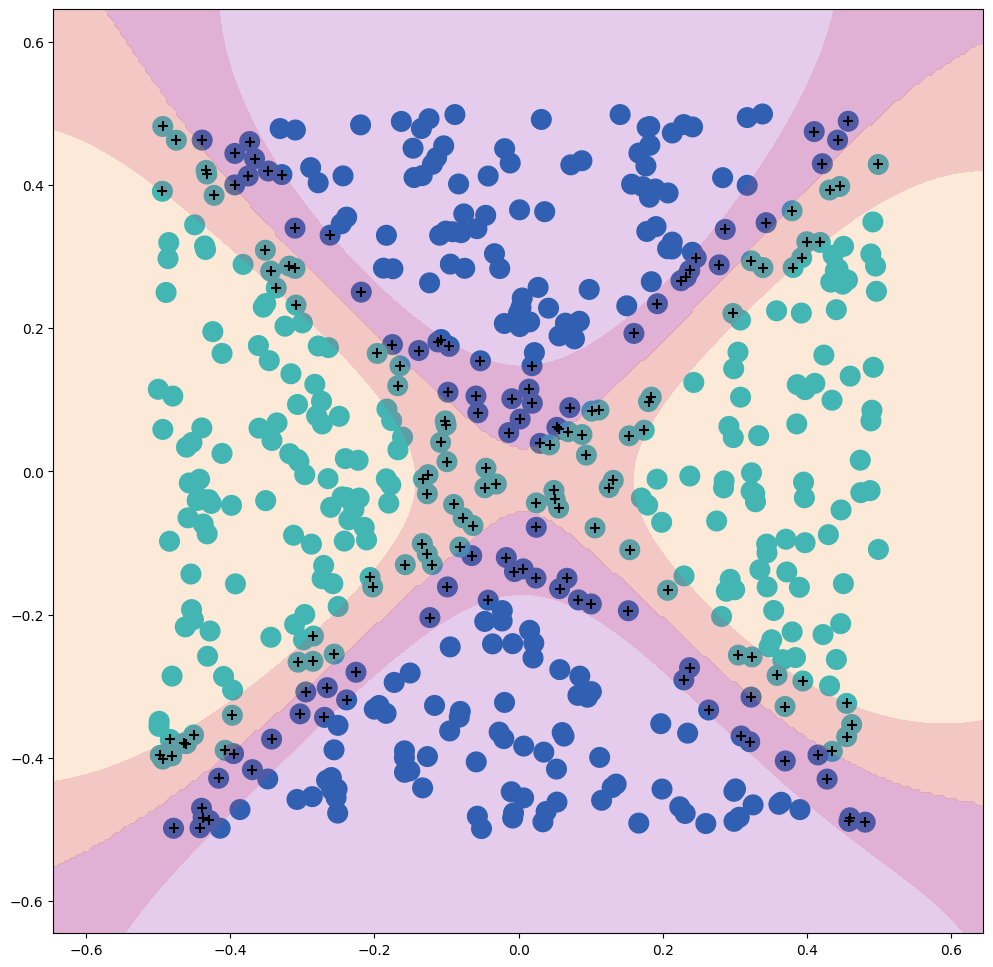

In [71]:
svm_poly = SVC(kernel='rbf').fit(X,y)
y_pred = svm_poly.predict(X)
ax = subplots(figsize=(12,12))[1]
plot_svm(X,
        y_pred,
        svm_poly,
        ax=ax)

In [73]:
print('Training error rate', 1-accuracy_score(y_pred,y))

Training error rate 0.014000000000000012


(i)

Comment on your results.

We can see that the support vector classifier performed the worst when predicting the training data, due to the data being non-linear. We can also see that the logistic classifer with non-linear $X = [X^2_1,X^2_2]$ performed the best, better than radial kernel SVM, because the data 
________________________________________________________________________________________________________________

9.7

In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the Auto data set.

In [109]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots, cm
import statsmodels.api as sm
from scipy.stats import (ttest_1samp,
                         ttest_rel,
                         ttest_ind,
                         t as t_dbn)
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multitest import multipletests as mult_test
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.tree import (DecisionTreeClassifier as DTC, 
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss,
                             RocCurveDisplay)
from sklearn.ensemble import \
                             (RandomForestRegressor as RF,
                             GradientBoostingRegressor as GBR)
from ISLP.bart import BART
import warnings; warnings.simplefilter('ignore')

In [110]:
auto = load_data('Auto')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


(a)

Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.

In [111]:
# find the median
mpg_median = np.median(auto['mpg'])

auto['mpg01'] = np.where(auto['mpg'] > mpg_median,1,0)

y = auto['mpg01']
X = auto.drop(['mpg','mpg01'],axis=1)
X.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,
chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,1
buick skylark 320,8,350.0,165,3693,11.5,70,1
plymouth satellite,8,318.0,150,3436,11.0,70,1
amc rebel sst,8,304.0,150,3433,12.0,70,1
ford torino,8,302.0,140,3449,10.5,70,1


(b)

Fit a support vector classifier to the data with various values of C, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results. Note you will need to fit the classifier without the gas mileage variable to produce sensible results.

In [112]:
svc = SVC(C=0.00001,kernel='linear').fit(X,y)
parameter = [0.001,0.01,0.1,1,2]
kfold = skm.KFold(5,
                 random_state=0,
                 shuffle=True)
grid = skm.GridSearchCV(svc,
                       {'C': parameter},
                        refit=True,
                       cv=kfold,
                       scoring='neg_mean_squared_error')

In [113]:
grid.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(C=1e-05, kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 2]},
             scoring='neg_mean_squared_error')

Text(0, 0.5, 'mean_test_error')

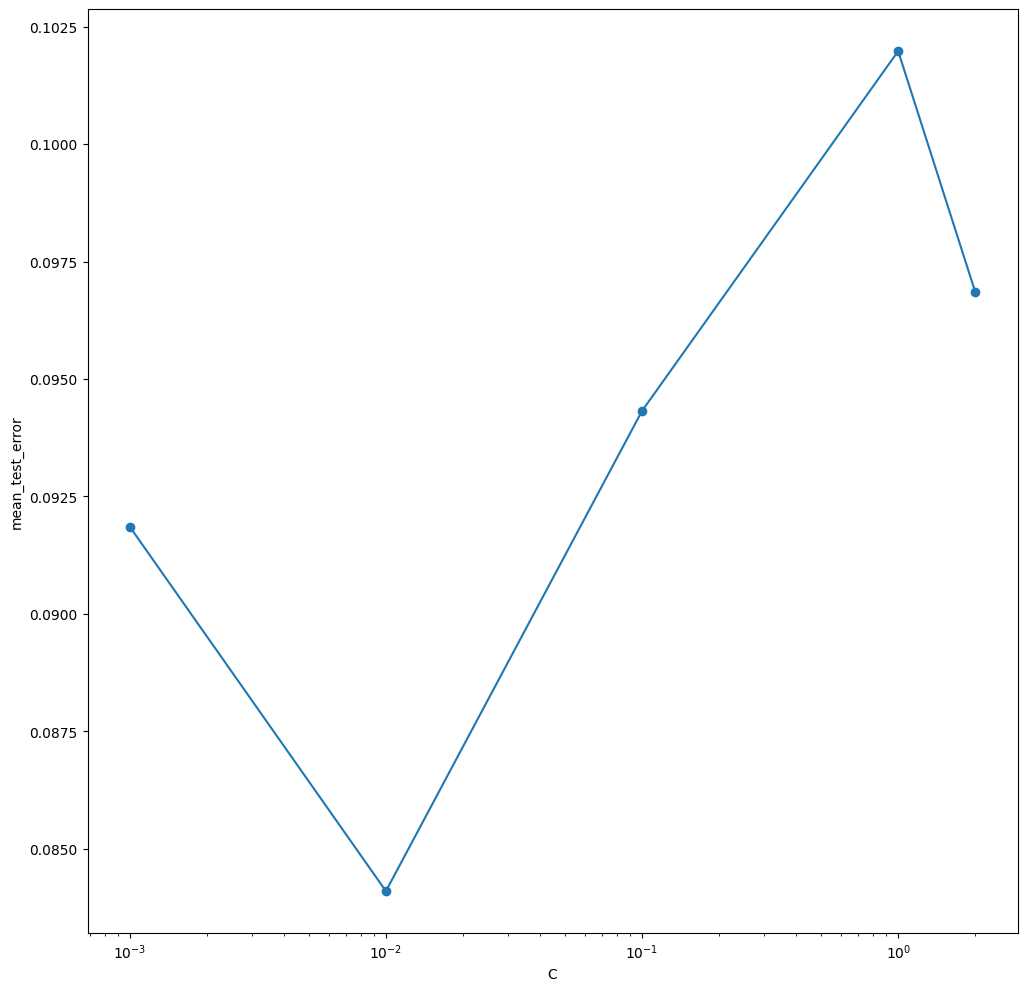

In [114]:
ax = subplots(figsize=(12,12))[1]
ax.plot(parameter,-grid.cv_results_['mean_test_score'],marker='o')
ax.set_xscale('log')
ax.set_xlabel('C')
ax.set_ylabel('mean_test_error')

In [115]:
idx = np.argmin(-grid.cv_results_['mean_test_score'])
parameter[idx]

0.01

Applying GridSearchCV we get that the C paramter should be 100 which if we apply that to our model, plot the results and check the classifer accuracy we get 

In [116]:
svc_new = SVC(C=parameter[idx],kernel='linear').fit(X,y)
y_pred = svc_new.predict(X)
confusion_table(y,y_pred)

Truth,0,1
Predicted,,
0,173,23
1,9,187


In [117]:
TP = confusion_table(y,y_pred)[1][1]
FP = confusion_table(y,y_pred)[0][1]
FN = confusion_table(y,y_pred)[1][0]

print('F1 score', 2*TP/(2*TP+FP+FN))

F1 score 0.9211822660098522


We get approximately $92\%$ accuracy on the training classification.
________________________________________________________________________________________________

(c)

Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with different values of gamma and degree and C. Comment on your results.

In [121]:
svm_rad = SVC(C=0.00001,gamma=0.00001,kernel='rbf',random_state=0).fit(X,y)
C_param = [0.1,0.2,0.5,0.7,0.9,1,2,5,10,15,30,50,75,100,1000]
gamma_param = [0.0001,0.01,0.001,0.1,1,2,3,4,5,6]
kfold = skm.KFold(5,
                 random_state=0,
                 shuffle=True)
grid = skm.GridSearchCV(svm_rad,
                       {'C': C_param,
                       'gamma': gamma_param},
                        refit=True,
                       cv=kfold,
                       scoring='neg_mean_squared_error')

In [122]:
grid.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(C=1e-05, gamma=1e-05, random_state=0),
             param_grid={'C': [0.1, 0.2, 0.5, 0.7, 0.9, 1, 2, 5, 10, 15, 30, 50,
                               75, 100, 1000]},
             scoring='neg_mean_squared_error')

In [123]:
grid.cv_results_

{'mean_fit_time': array([0.00621362, 0.00333366, 0.0025939 , 0.00159688, 0.00309663,
        0.0034759 , 0.00255852, 0.00235639, 0.00358429, 0.00458379,
        0.00413213, 0.00103106, 0.00315804, 0.00350871, 0.00796814]),
 'std_fit_time': array([0.00253437, 0.00037875, 0.00056053, 0.00135338, 0.00619326,
        0.0012931 , 0.00123366, 0.00151883, 0.00621346, 0.00222856,
        0.00320423, 0.00131331, 0.00094495, 0.00075955, 0.0021003 ]),
 'mean_score_time': array([0.00237694, 0.00217285, 0.00206151, 0.00092287, 0.00319705,
        0.00160561, 0.00180645, 0.0008028 , 0.0027308 , 0.00200191,
        0.00040007, 0.00435205, 0.00120459, 0.00120392, 0.00195341]),
 'std_score_time': array([6.07969482e-04, 6.23131495e-04, 1.24622064e-04, 9.07834678e-04,
        6.39410019e-03, 8.02803224e-04, 9.83745398e-04, 9.83228917e-04,
        4.89004672e-03, 2.48047005e-06, 8.00132751e-04, 6.75796129e-03,
        9.83540667e-04, 9.82995350e-04, 1.03498645e-04]),
 'param_C': masked_array(data=[0.1, 0.

In [12]:
svm_rad = SVC(C=0.9,gamma=0.001,kernel='rbf').fit(X,y)
y_pred_rad = svm_rad.predict(X)

confusion_table(y,y_pred_rad)

Truth,0,1
Predicted,,
0,187,9
1,6,190


In [13]:
TP = confusion_table(y,y_pred_rad)[1][1]
FP = confusion_table(y,y_pred_rad)[0][1]
FN = confusion_table(y,y_pred_rad)[1][0]

print('F1 score', 2*TP/(2*TP+FP+FN))

F1 score 0.9620253164556962


(d)

Make some plots to back up your assertions in (b) and (c).

Hint: In the lab, we used the plot_svm() function for fitted SVMs. When p>2, you can use the keyword argument features to create plots displaying pairs of variables at a time.

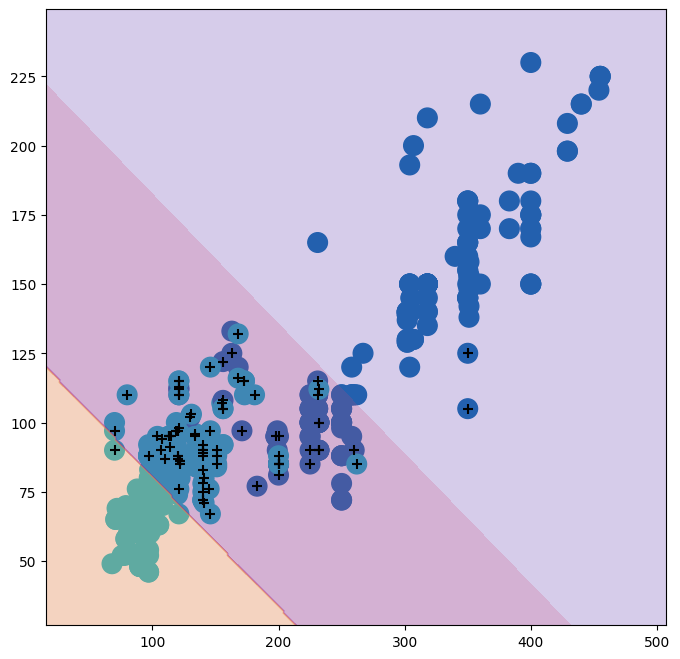

In [17]:
ax = subplots(figsize=(8,8))[1]
plot_svm(X,
        y_pred,
        svc_new,
         features=(1,2),
        ax=ax)

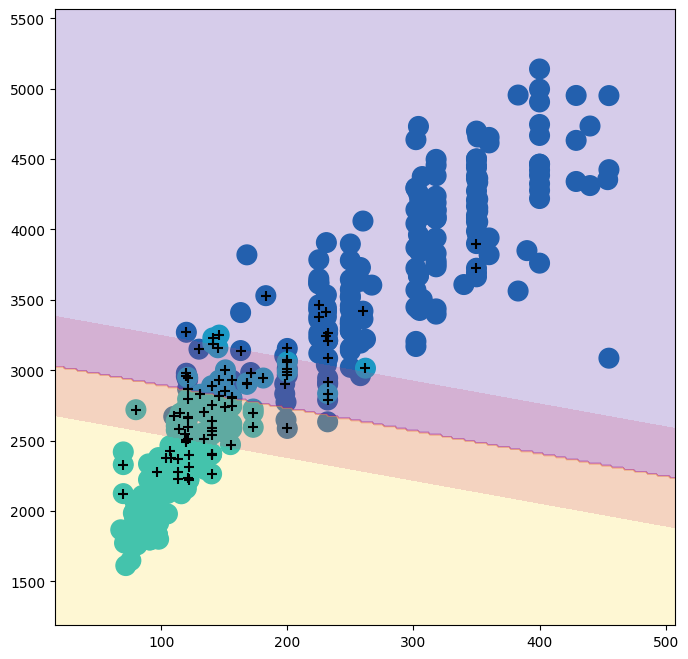

In [18]:
ax = subplots(figsize=(8,8))[1]
plot_svm(X,
        y_pred,
        svc_new,
         features=(1,3),
        ax=ax)

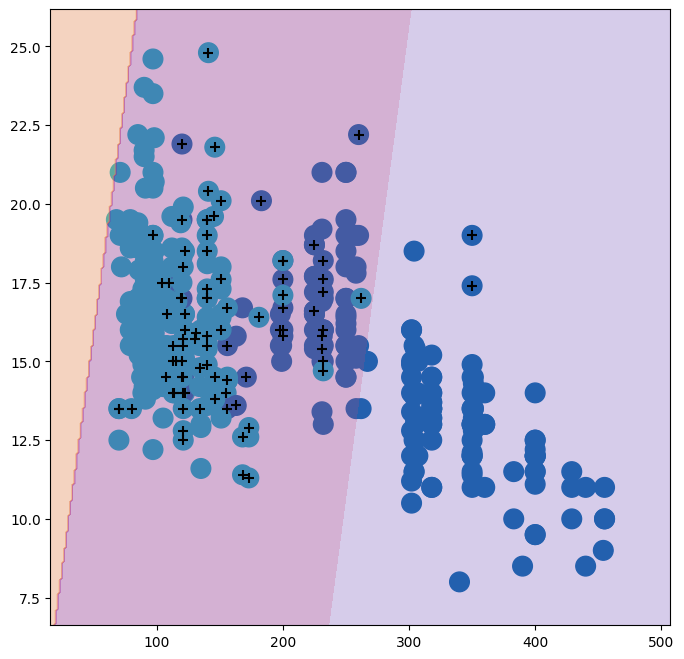

In [19]:
ax = subplots(figsize=(8,8))[1]
plot_svm(X,
        y_pred,
        svc_new,
         features=(1,4),
        ax=ax)

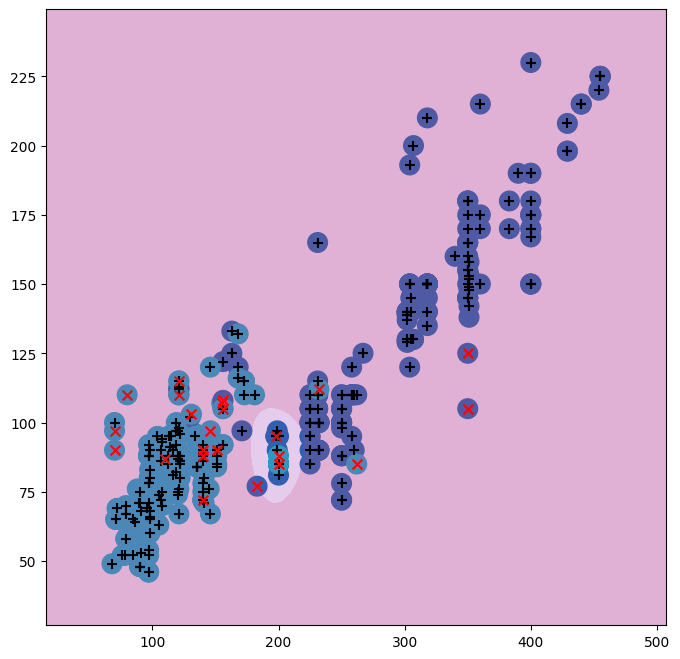

In [20]:
ax = subplots(figsize=(8,8))[1]
plot_svm(X,
        y_pred,
        svm_rad,
         features=(1,2),
        ax=ax)

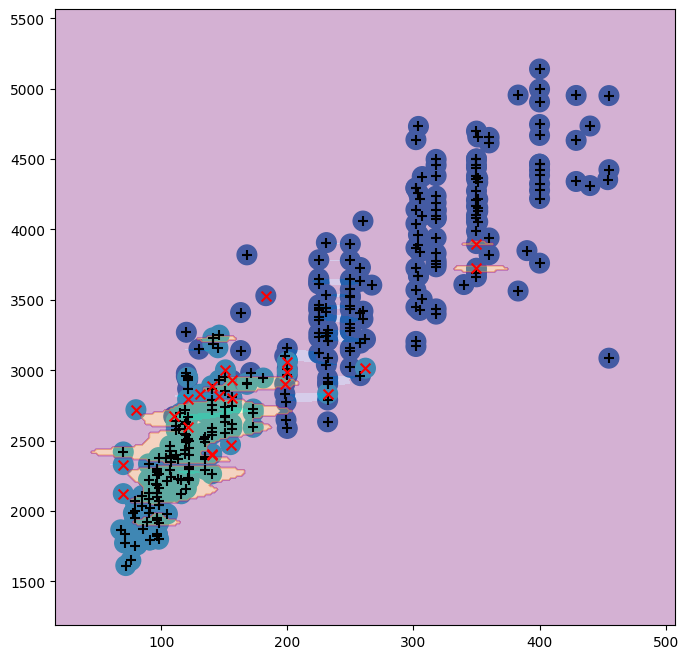

In [21]:
ax = subplots(figsize=(8,8))[1]
plot_svm(X,
        y_pred,
        svm_rad,
         features=(1,3),
        ax=ax)

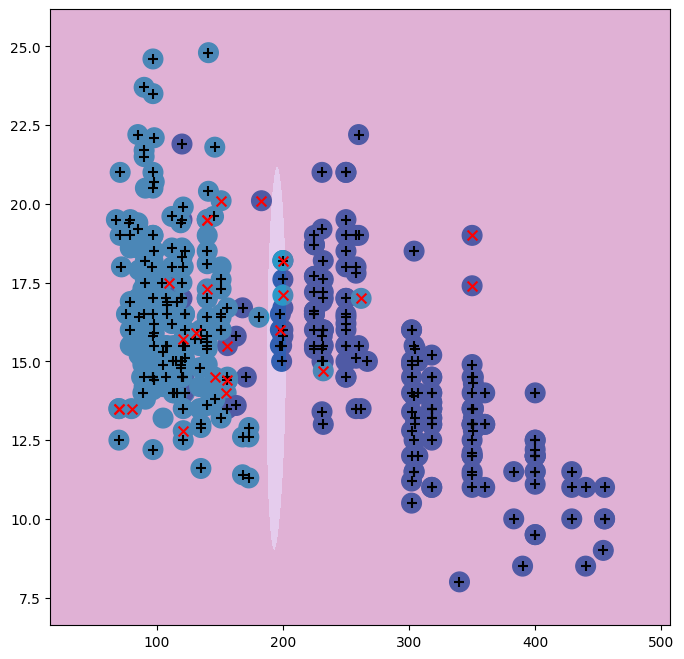

In [22]:
ax = subplots(figsize=(8,8))[1]
plot_svm(X,
        y_pred,
        svm_rad,
         features=(1,4),
        ax=ax)

The plots are not very explanatory so we could use OVO (One Vs One) or OVR (One Vs Rest)

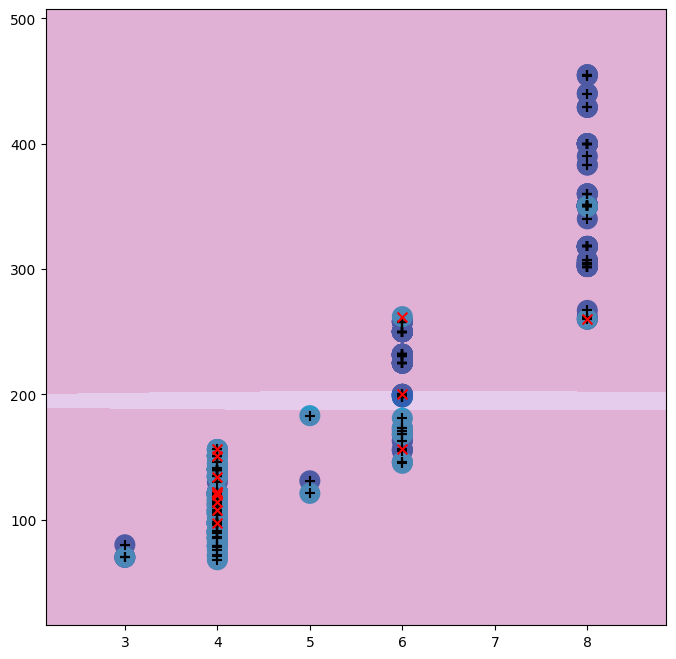

In [30]:
svm_rad_7 = SVC(C=0.9,gamma=0.001,kernel='rbf', decision_function_shape='ovo').fit(X,y)
y_pred_rad = svm_rad.predict(X)
ax = subplots(figsize=(8,8))[1]
plot_svm(X,
        y,
        svm_rad_7,
         scatter_cmap=cm.tab10,
         ax=ax)

9.8

This problem involves the OJ data set which is part of the ISLP package.

In [124]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots, cm
import statsmodels.api as sm
from scipy.stats import (ttest_1samp,
                         ttest_rel,
                         ttest_ind,
                         t as t_dbn)
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multitest import multipletests as mult_test
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.tree import (DecisionTreeClassifier as DTC, 
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss,
                             RocCurveDisplay)
from sklearn.ensemble import \
                             (RandomForestRegressor as RF,
                             GradientBoostingRegressor as GBR)
from ISLP.bart import BART
import warnings; warnings.simplefilter('ignore')

car = load_data('Caravan')
car.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


(a)

Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [125]:
car_train, car_test = skm.train_test_split(car,train_size=800,random_state=0)
#car_train['Store7-01'] = np.where(car_train['Store7'] == 'No',0,1)
#car_test['Store7-01'] = np.where(car_test['Store7'] == 'No',0,1)

(b)

Fit a support vector classifier to the training data using C = 0.01, with Purchase as the response and the other variables as predictors. How many support points are there?

In [126]:
y_train, y_test = car_train['Purchase'], car_test['Purchase']
X_train, X_test = car_train.drop(['Purchase'],axis=1), car_test.drop(['Purchase'],axis=1)
C_var = 0.01
svc = SVC(C=C_var,kernel='linear',random_state=0).fit(X_train,y_train)

In [127]:
print('Number of support points in class {} is {} \nNumber of support points in class {} is {}'.format(svc.classes_[0],svc.n_support_[0],svc.classes_[1],svc.n_support_[1]))

Number of support points in class No is 91 
Number of support points in class Yes is 49


(c)

What are the training and test error rates?

In [128]:
# training and test predictions
y_predtr = svc.predict(X_train)
y_predts = svc.predict(X_test)

print('Training error rate {:.2f}%'.format((1-accuracy_score(y_train,y_predtr))*100))
print('Test error rate {:.2f}%'.format((1-accuracy_score(y_test,y_predts))*100))

Training error rate 6.13%
Test error rate 5.95%


(d)

Use cross-validation to select an optimal C. Consider values in the range 0.01 to 10.

In [133]:
C_param = [0.01,0.05,0.1,0.5,1,1.5,2]
svc = SVC(kernel='linear',random_state=0)
kfold = skm.KFold(5,
                 random_state=0,
                 shuffle=True)
grid = skm.GridSearchCV(svc,
                       {'C': C_param},
                       refit=True,
                       cv=kfold,
                       scoring='accuracy')

In [134]:
grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(kernel='linear', random_state=0),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 1.5, 2]},
             scoring='accuracy')

In [135]:
grid.best_estimator_

SVC(C=0.01, kernel='linear', random_state=0)

In [136]:
grid.cv_results_

{'mean_fit_time': array([0.01219501, 0.01591311, 0.01960216, 0.03176675, 0.06019154,
        0.07351542, 0.07323632]),
 'std_fit_time': array([0.00199286, 0.00933812, 0.01331603, 0.00974442, 0.01775845,
        0.02735354, 0.01816292]),
 'mean_score_time': array([0.00234017, 0.00180302, 0.00079803, 0.00035019, 0.00095148,
        0.00147719, 0.00190225]),
 'std_score_time': array([0.00129446, 0.00116738, 0.00097739, 0.00070038, 0.00118883,
        0.00075137, 0.0001288 ]),
 'param_C': masked_array(data=[0.01, 0.05, 0.1, 0.5, 1.0, 1.5, 2.0],
              mask=[False, False, False, False, False, False, False],
        fill_value=1e+20),
 'params': [{'C': 0.01},
  {'C': 0.05},
  {'C': 0.1},
  {'C': 0.5},
  {'C': 1},
  {'C': 1.5},
  {'C': 2}],
 'split0_test_score': array([0.95   , 0.95   , 0.95   , 0.94375, 0.9375 , 0.94375, 0.94375]),
 'split1_test_score': array([0.925  , 0.925  , 0.91875, 0.91875, 0.9125 , 0.9125 , 0.9125 ]),
 'split2_test_score': array([0.9375 , 0.9375 , 0.9375 , 0.925

(e)

Compute the training and test error rates using this new value for C.

In [138]:
svc_new = SVC(C=0.01,kernel='linear',random_state=0).fit(X_train,y_train)
y_predtr = svc_new.predict(X_train)
y_predts = svc_new.predict(X_test)

print('Training error for C=1 is {:.2f}%'.format((1-accuracy_score(y_train,y_predtr))*100))
print('Test error for C=1 is {:.2f}%'.format((1-accuracy_score(y_test,y_predts))*100))

Training error for C=1 is 6.13%
Test error for C=1 is 5.95%


(f)

Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use the default value for gamma.

In [139]:
C_var = 0.0001
svm_rad = SVC(C=C_var, kernel='rbf').fit(X_train,y_train)
print('Number of support points in class {} is {} \nNumber of support points in class {} is {}'.format(svm_rad.classes_[0],svm_rad.n_support_[0],svm_rad.classes_[1],svm_rad.n_support_[1]))
svm_rad

Number of support points in class No is 49 
Number of support points in class Yes is 49


SVC(C=0.0001)

In [140]:
y_predtr = svm_rad.predict(X_train)
y_predts = svm_rad.predict(X_test)

print('Training error rate {:.2f}%'.format((1-accuracy_score(y_train,y_predtr))*100))
print('Test error rate {:.2f}%'.format((1-accuracy_score(y_test,y_predts))*100))

Training error rate 6.13%
Test error rate 5.95%


In [141]:
C_param = [0.001,0.01,0.05,0.1,0.5,1,1.5,5,10]
svm_rad = SVC(kernel='rbf',random_state=0).fit(X_train,y_train)
kfold = skm.KFold(5,
                 random_state=0,
                 shuffle=True)
grid_rad = skm.GridSearchCV(svm_rad,
                       {'C': C_param},
                       refit=True,
                       cv=kfold,
                       scoring='accuracy',return_train_score=True)

In [142]:
grid_rad.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(random_state=0),
             param_grid={'C': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 1.5, 5, 10]},
             return_train_score=True, scoring='accuracy')

In [143]:
grid_rad.cv_results_

{'mean_fit_time': array([0.00430536, 0.00294552, 0.00728302, 0.00415483, 0.00496345,
        0.00182395, 0.00344863, 0.00195265, 0.00476398]),
 'std_fit_time': array([0.00062713, 0.00151542, 0.00559676, 0.00612477, 0.00098104,
        0.0036479 , 0.00453367, 0.00245404, 0.00238418]),
 'mean_score_time': array([0.00242362, 0.00221629, 0.00238624, 0.0040709 , 0.0027535 ,
        0.01277218, 0.01095281, 0.00320001, 0.00548744]),
 'std_score_time': array([0.00047144, 0.00134998, 0.00148178, 0.0067457 , 0.00102879,
        0.0063868 , 0.00638071, 0.00370509, 0.0052933 ]),
 'param_C': masked_array(data=[0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 1.5, 5.0, 10.0],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value=1e+20),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.05},
  {'C': 0.1},
  {'C': 0.5},
  {'C': 1},
  {'C': 1.5},
  {'C': 5},
  {'C': 10}],
 'split0_test_score': array([0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 

In [144]:
svmr_new = SVC(C=0.001,kernel='rbf',random_state=0,gamma='scale').fit(X_train,y_train)
y_predtrr = svmr_new.predict(X_train)
y_predtsr = svmr_new.predict(X_test)

print('Training error, for C=0.01, is {:.2f}%'.format((1-accuracy_score(y_train,y_predtrr))*100))
print('Test error, for C=0.01, is {:.2f}%'.format((1-accuracy_score(y_test,y_predtsr))*100))

Training error, for C=0.01, is 6.13%
Test error, for C=0.01, is 5.95%


(g)

Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set degree = 2.

In [102]:
C_var = 0.01
svm_poly = SVC(C=C_var,kernel='poly',degree=2,random_state=0).fit(X_train,y_train)
print('Number of support points in class {} is {} \nNumber of support points in class {} is {}'.format(svm_poly.classes_[0],svm_poly.n_support_[0],svm_poly.classes_[1],svm_poly.n_support_[1]))

Number of support points in class CH is 300 
Number of support points in class MM is 300


In [103]:
y_predtr = svm_poly.predict(X_train)
y_predts = svm_poly.predict(X_test)

print('Training error rate {:.2f}%'.format((1-accuracy_score(y_train,y_predtr))*100))
print('Test error rate {:.2f}%'.format((1-accuracy_score(y_test,y_predts))*100))

Training error rate 37.50%
Test error rate 43.33%


In [104]:
C_param = [0.01,0.05,0.1,0.5,1,1.5,5,10]
svm_poly = SVC(kernel='poly',degree=2,random_state=42)
kfold = skm.KFold(5,
                 random_state=0,
                 shuffle=True)
grid = skm.GridSearchCV(svm_poly,
                       {'C': C_param},
                       refit=True,
                       cv=kfold,
                       scoring='accuracy')

In [105]:
grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(degree=2, kernel='poly', random_state=42),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 1.5, 5, 10]},
             scoring='accuracy')

In [106]:
grid.best_estimator_

SVC(C=0.01, degree=2, kernel='poly', random_state=42)

In [107]:
grid.cv_results_

{'mean_fit_time': array([0.00804009, 0.00681648, 0.00798664, 0.00842004, 0.00654159,
        0.0026062 , 0.00240712, 0.00551271]),
 'std_fit_time': array([0.00141387, 0.00076771, 0.00570614, 0.00802124, 0.00114497,
        0.00320869, 0.00294811, 0.0052095 ]),
 'mean_score_time': array([0.00474296, 0.0032937 , 0.00155077, 0.00081968, 0.00243855,
        0.0039588 , 0.00709505, 0.00040107]),
 'std_score_time': array([0.00191417, 0.00115181, 0.00141801, 0.00135194, 0.00035617,
        0.00598252, 0.00709172, 0.00080214]),
 'param_C': masked_array(data=[0.01, 0.05, 0.1, 0.5, 1.0, 1.5, 5.0, 10.0],
              mask=[False, False, False, False, False, False, False, False],
        fill_value=1e+20),
 'params': [{'C': 0.01},
  {'C': 0.05},
  {'C': 0.1},
  {'C': 0.5},
  {'C': 1},
  {'C': 1.5},
  {'C': 5},
  {'C': 10}],
 'split0_test_score': array([0.66875, 0.66875, 0.66875, 0.66875, 0.66875, 0.66875, 0.66875,
        0.66875]),
 'split1_test_score': array([0.61875, 0.61875, 0.61875, 0.61875,

In [108]:
svm_poly = SVC(C=C_var,kernel='poly',degree=2,random_state=0).fit(X_train,y_train)
y_predtr = svm_poly.predict(X_train)
y_predts = svm_poly.predict(X_test)

print('Training error rate {:.2f}%'.format((1-accuracy_score(y_train,y_predtr))*100))
print('Test error rate {:.2f}%'.format((1-accuracy_score(y_test,y_predts))*100))

Training error rate 37.50%
Test error rate 43.33%


(h)

Overall, which approach seems to give the best results on this data?

The problem that I encountered was that with grid search cross-validation method the variable C didn't change the SVM with radial basis function or with polynomial kernel. Which I think is false since C should control the bias-variance trade-off, by constraining the margins for the classifier.

For my work above the linear SVC seems to get the lowest error rate compared to rbf and poly methods.
___________________________________________________________________________________________________________________